In [1]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import dtale


In [2]:
df = pd.read_json('transactionsjson.json',lines=True)


Get info on data, see the numeric and categorical variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [4]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


Check if columns have any values, otherwise drop them.

In [5]:
df = df.drop(['accountNumber','echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd',] ,axis=1)

In [6]:
df.head(-5)

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786353,732852505,50000,49796.87,2016-12-10T12:24:38,190.41,EZ Putt Putt #804489,US,US,09,01,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,203.13,True,False,False
786354,732852505,50000,49606.46,2016-12-10T23:29:11,83.97,KFC #206511,US,US,05,08,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,393.54,True,False,False
786355,732852505,50000,49522.49,2016-12-18T14:06:34,157.22,Uber,US,US,09,01,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,477.51,False,False,False
786356,732852505,50000,49365.27,2016-12-19T03:25:53,408.83,Lyft,US,US,09,01,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,634.73,False,False,False


In [7]:
#Get correct datatypes
df.customerId = df.customerId.astype('object')
df.creditLimit = df.creditLimit.astype('object')

In [8]:
#Change columns to Datetime
df.transactionDateTime = pd.to_datetime(df.transactionDateTime.str.strip())
df.dateOfLastAddressChange = pd.to_datetime(df.dateOfLastAddressChange.str.strip())
df.accountOpenDate = pd.to_datetime(df.accountOpenDate.str.strip())




In [9]:
#Create different time columns 
df['month'] = df.transactionDateTime.dt.month
df['day'] = df.transactionDateTime.dt.day
df['dayofweek'] = df.transactionDateTime.dt.dayofweek
df['hour'] = df.transactionDateTime.dt.hour

In [10]:
#difference in days of account open vs last change  
df['diff'] = (df.accountOpenDate - df.dateOfLastAddressChange).dt.days

Explore the fraud occurrences in the dataset

In [11]:
#Create Fraud/nofraud dataframes
Fdf = df[df['isFraud']==True]
nFdf = df[df['isFraud']==False]

In [12]:
fraction = len(Fdf)/float(len(nFdf))

print("fraud cases : {}".format(len(Fdf)))
print("valid cases : {}".format(len(nFdf)))
print('fraud case % : {}'.format(fraction))
                        

fraud cases : 12417
valid cases : 773946
fraud case % : 0.016043754990658264


We have a very imbalanced dataset.  Only a small amount of fraud cases we can use to train on.  
This is a common scenario in the world of fraud detection, where most transactions are legitimate.  

In [13]:
Fdf.transactionAmount.sum()

2796505.89

In [14]:
Fdf.transactionAmount.mean()

225.2159048079239

In [15]:
nFdf.transactionAmount.mean()

135.57024862199447

We can see the total amount of Fraud transactions is about $2.8 million on 12,417 cases.

The average legitimate transaction amounts are 135.57.

While the average fraud transaction amounts are 225.21.

Split the Numeric and Categorical variables.  

In [16]:
cats = df[[
    'customerId', 'merchantName', 'acqCountry', 'merchantCountryCode',
    'posEntryMode', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
    'creditLimit', 'posConditionCode', 'transactionType',
]]

In [17]:
cats.describe()

,customerId,merchantName,acqCountry,merchantCountryCode,posEntryMode,cardPresent,expirationDateKeyInMatch,isFraud,creditLimit,posConditionCode,transactionType
count,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363,786363
unique,5000,2490,5,5,6,2,2,2,10,4,4
top,380680241,Uber,US,US,05,False,False,False,5000,01,PURCHASE
freq,32850,25613,774709,778511,315035,433495,785320,773946,201863,628787,745193


We can see that we have 5000 unique customerIds and they have 10 different creditlimit categories.
The most common merchant is Uber. 

In [18]:
#all non fraud transactions numerics
df_numeric = nFdf[['availableMoney','transactionAmount','currentBalance',]]
#Fraud only transaction numerics
Fdf_numeric = Fdf[['availableMoney','transactionAmount','currentBalance',]]

We will begin exploring the numeric features of the dataset. 

We don't have too many columns to work with but lets take a took.

<AxesSubplot:xlabel='currentBalance', ylabel='Count'>

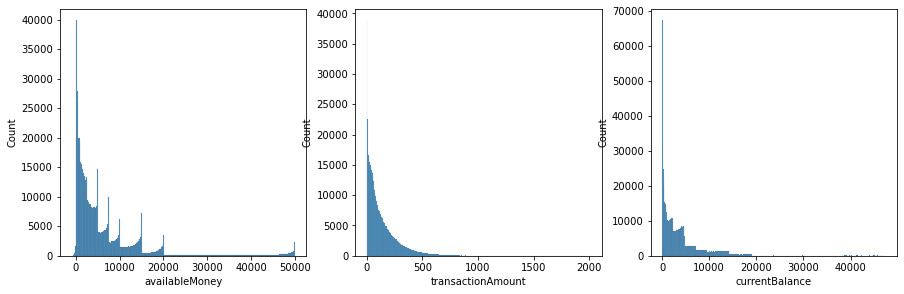

In [19]:
#All Transactions
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.histplot(df_numeric.availableMoney,ax=ax1) 
ax2 = fig.add_subplot(2,3,2)
sns.histplot(df_numeric.transactionAmount,ax=ax2)
ax3 = fig.add_subplot(2,3,3)
sns.histplot(df_numeric.currentBalance,ax=ax3)

<AxesSubplot:xlabel='currentBalance', ylabel='Count'>

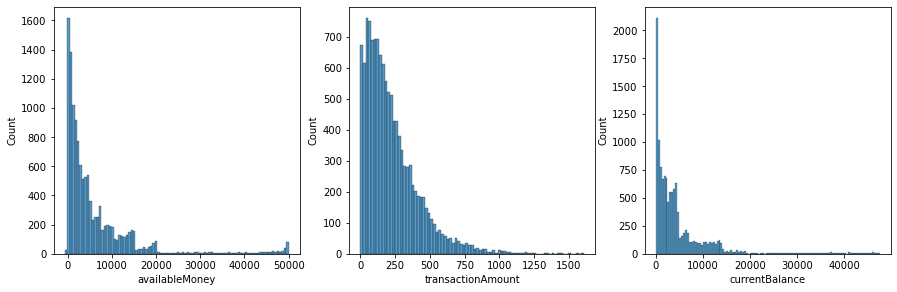

In [20]:
#Fraud == True Transactions
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.histplot(Fdf_numeric.availableMoney,ax=ax1) 
ax2 = fig.add_subplot(2,3,2)
sns.histplot(Fdf_numeric.transactionAmount,ax=ax2)
ax3 = fig.add_subplot(2,3,3)
sns.histplot(Fdf_numeric.currentBalance,ax=ax3)


We can see extreme skew in the data visually indicating the imbalanced nature of the transactions.  Fraud vs Non Fraud transactions show a similar level of skewness.  


In [21]:
Fdf_numeric.describe() 

,availableMoney,transactionAmount,currentBalance
count,12417.000000,12417.000000,12417.000000
mean,6142.894186,225.215905,4902.064338
std,8703.131117,189.551393,7074.701649
min,-614.390000,0.000000,0.000000
25%,1078.020000,86.000000,822.210000
50%,3120.950000,176.980000,2747.390000
75%,7502.820000,311.460000,5644.350000
max,50000.000000,1608.350000,47473.940000


In [22]:
df_numeric.describe()

,availableMoney,transactionAmount,currentBalance
count,773946.000000,773946.000000,773946.000000
mean,6252.455386,135.570249,4502.428675
std,8883.600096,146.525305,6446.866656
min,-1005.630000,0.000000,0.000000
25%,1077.420000,33.190000,688.032500
50%,3186.145000,86.760000,2446.940000
75%,7500.000000,189.390000,5286.100000
max,50000.000000,2011.540000,47498.810000


We can see the mean availableMoney and currentBalance columns for Fraud vs no-Fraud are very similar.  The largest difference is the transaction amount. 135 no-Fraud vs 225 Fraud

The mean/std transaction size is larger for fraud vs no fraud...


What are the spending habits / patterns of the transactions?  What features stand out between fraud and no-fraud transactions.
Compare Distributions on merchants between fraud/no-fraud. 
    

Most popular merchants by # of transactions

Lyft                        760
ebay.com                    639
Fresh Flowers               553
Uber                        512
walmart.com                 446
                           ... 
Hyatt House #770440           1
Universe Massage #596422      1
Powerlifting #764704          1
Cinnabon #124416              1
Dunkin' Donuts #387966        1
Name: merchantName, Length: 1042, dtype: int64

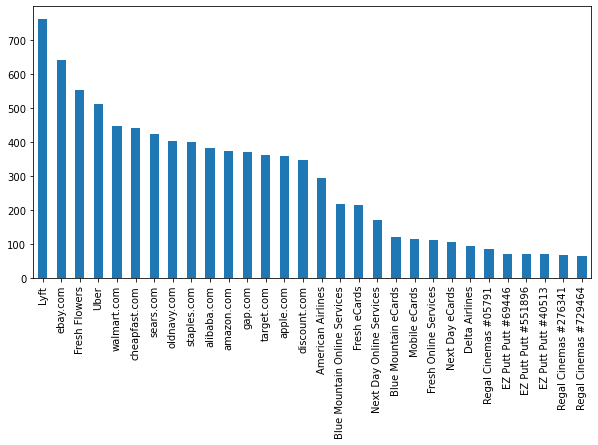

In [23]:
#Popular merchants in Fraud transactions
Fdf['merchantName'].value_counts().nlargest(30).plot(kind='bar',figsize=(10,5))
Fdf.merchantName.value_counts()

Uber                        25101
Lyft                        24763
oldnavy.com                 16591
staples.com                 16581
alibaba.com                 16576
                            ...  
Boost Mobile #104815            2
Runners #383214                 2
EZ Wireless #149871             1
Curves #849125                  1
TMobile Wireless #602341        1
Name: merchantName, Length: 2490, dtype: int64

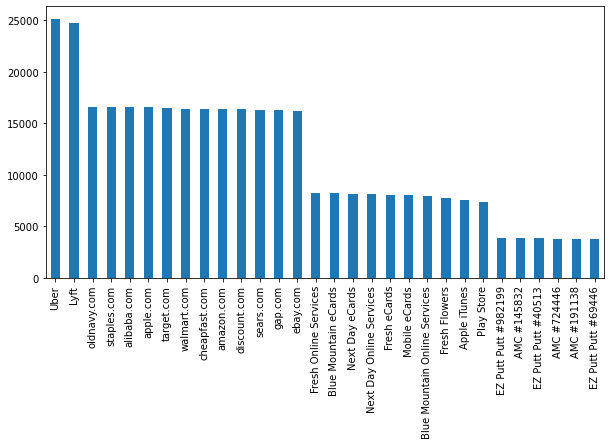

In [24]:
#Popular Merchants in Valid Transactions
nFdf['merchantName'].value_counts().nlargest(30).plot(kind='bar',figsize=(10,5))
nFdf.merchantName.value_counts()


The Fraud vs no-Fraud vendor count is similar, however one vendor Fresh Flowers seems to stand out as it is #3 in fraud but #22 in overall transactions by count.

In [25]:
Fdf.cardPresent.value_counts(normalize=True)


False    0.721752
True     0.278248
Name: cardPresent, dtype: float64

In [26]:
df.cardPresent.value_counts(normalize=True)

False    0.551266
True     0.448734
Name: cardPresent, dtype: float64

(cardPresent = False) during Fraud transactions was 72% of time vs only 55% for all transactions.  


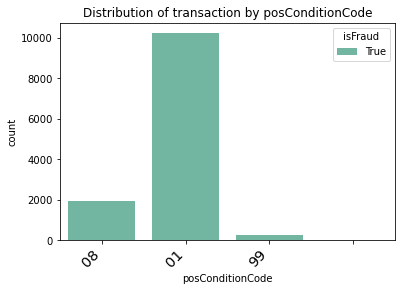

In [27]:
ax = sns.countplot(x="posConditionCode",hue='isFraud', data=Fdf, palette="Set2")
ax.set_title("Distribution of transaction by posConditionCode")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

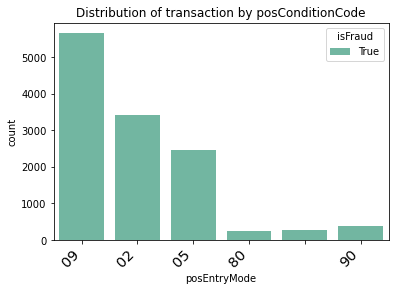

In [28]:
ax = sns.countplot(x="posEntryMode",hue='isFraud', data=Fdf, palette="Set2")
ax.set_title("Distribution of transaction by posConditionCode")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

Vast Majority of fraud Transactions go through POS code 01  and POS entry Mode 09

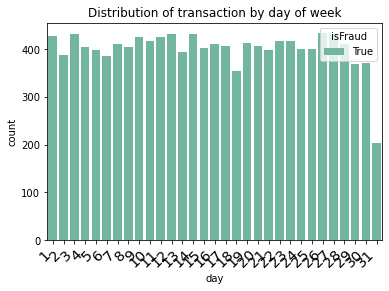

In [29]:
#fraud transaction amounts by Day
ax = sns.countplot(x="day", hue = 'isFraud', data=Fdf, palette="Set2")
ax.set_title("Distribution of transaction by day of week")

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

A very even amount of fraud transactions per day of the week save for the last of the month.  

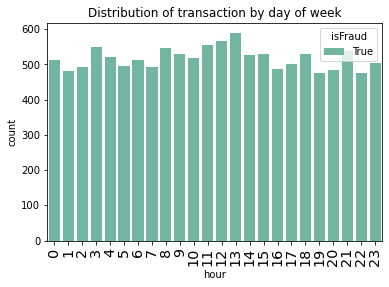

In [30]:
#fraud transaction amounts by hour 
ax = sns.countplot(x="hour", hue = 'isFraud', data=Fdf, palette="Set2")
ax.set_title("Distribution of transaction by day of week")

plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
);

Count of Fraud transactions by hour of the day doesn't seem to show any big spikes. a slight increase around the middle of the day

Run a heatmap to see if any features are correlated 

In [31]:
corr = df.corr()

<AxesSubplot:>

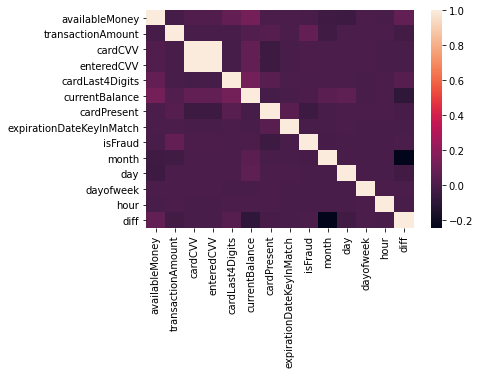

In [32]:
sns.heatmap(corr)

Not too much information here but we see slight correlations to fraud in the currentBalance and transactionAmount columns